# Redes Neuronales Artificiales
## Perceptrón Simple


Un Perceptrón simple (PS) es la red neuronal más sencilla que se puede considerar, está conformado por una sola neurona que posee N entradas y una función de transferencia de tipo umbral, tal como se ve en la siguiente figura:


<pre>
<center><img src="https://drive.google.com/uc?export=view&id=1d6bm40h-hVkjVNaMuoEtJGa0praa2wUs" width=700></center>
</pre>

Haciendo un pequeño cambio y llevando el umbral $\theta$ hacia la izquierda en las ecuaciones anteriores, podemos definir un nuevo peso
$w_0 = -\theta$ y la entrada $x_0 = 1$ para poder escribir la salida de forma más compacta:

<pre>
<center><img src="https://drive.google.com/uc?export=view&id=1d25bKx-ne-tgg9aW3RbZiH_a3CrdsrKT" width=700></center>
</pre>

Podemos representar la salida con la siguiente expresión: $$y = sign(\sum\limits_{i=0}^N {x_i w_i})$$

_**sign**_ corresponde a la función signo y es la _función de activación_ del perceptrón simple (también podría ser la función heaviside). Más adelante veremos que existen otras funciones de activación para otras aplicaciones.

El PS permite resolver problemas linealmente separables mediante una recta o un hiperplano de separación con ordenada al origen distinta de cero gracias al término de _Bias_

<pre>
<center><img src="https://drive.google.com/uc?export=view&id=1d7FF-V_6ysD3yEYKnNIi_YBXFPuWkSJG" width=500></center>
</pre>

A continuación tenemos el algoritmo de entrenamiento o _Regla del Perceptrón Simple_ 🙂

Esta regla puede implementarse siguiendo estos pasos:
1. Inicializar el vector de pesos w con valores aleatorios entre 0 y 1.
2. Presentar un patrón de entrada x y calcular la salida $$y = sign(x_0 w_0 + \sum\limits_{i=1}^N {x_i w_i})$$  Recordemos que $w_0$ es el término de bias y $x_0=1$, podemos representar la suma de productos usando un producto punto entre vectores: $$y = sign( w_0 + \vec{w}^T \cdot \vec{x})$$

3. Calcular el error entre la salida obtenida y la salida deseada $y_d$ $$e = y - y_d$$
4. Ajustar los pesos de la red con la siguiente ecuación: $$ \vec{w} = \vec{w} + \mu \vec{e} \cdot \vec{x}$$ $\mu$ es el coeficiente de aprendizaje o factor de entrenamiento (eta)
5. Volver al paso 2 y repetir el proceso

In [33]:
# Librerías a importar
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
#from utiles import plot_decision_regions
from sklearn.preprocessing import StandardScaler

## Dataset Iris
El conjunto de datos flor Iris contiene 50 muestras de cada una de tres especies de Iris (Iris setosa, Iris versicolor e Iris virginica), en total 150 muestras. Se midió cuatro rasgos de cada muestra: el largo y ancho del sépalo y pétalo, en centímetros.

>Nosotros vamos a utilizar nuestro perceptrón para separar dos clases de flores (Iris setosa e Iris versicolor) según dos de sus características: Largo de sépalo (primer columna en el dataset) y largo de pétalo (tercer columna).  

In [34]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [35]:
df2 = df[[0,2,4]].iloc[0:100]
columnas = {0: 'Largo_petalo', 2:'Largo_sepalo', 4:'clase'}
df2.rename(columns=columnas, inplace=True)
df2.head()

,Largo_petalo,Largo_sepalo,clase
0,5.1,1.4,Iris-setosa
1,4.9,1.4,Iris-setosa
2,4.7,1.3,Iris-setosa
3,4.6,1.5,Iris-setosa
4,5.0,1.4,Iris-setosa


# Graficamos el Dataset

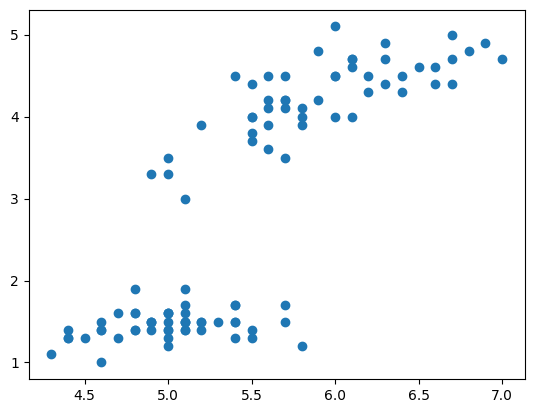

In [36]:
plt.scatter(df2.Largo_petalo, df2.Largo_sepalo)

# Entrenamiento del Perceptrón

Separar los datos en conjunto de entrenamiento y prueba (20%)

In [37]:
# Division de datos de entrenamiento y prueba
from sklearn.model_selection import train_test_split

caracteristicas = df2.iloc[:, :2]
target = df2.iloc[:, 2]
target = target.map({'Iris-setosa':0, 'Iris-versicolor':1})

X = caracteristicas.copy()
y = target.copy()

print(X.shape)
print(y.shape)

(100, 2)
(100,)


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=1,  stratify = y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(80, 2)
(20, 2)
(80,)
(20,)


In [39]:
#Escalamos los datos
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler()),
])

In [40]:
X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

Entrenamos el perceptrón con un `eta=0.1`, una semilla `random_state=1` y `shuffle=True`. Ver [documentación](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html)

In [41]:
ppn = Perceptron(max_iter=30, eta0=0.1, random_state=1, shuffle=True)
ppn.fit(X_train, y_train)

Perceptron(eta0=0.1, max_iter=30, random_state=1)

**coeficientes o pesos de la recta de separación**

In [42]:
w = ppn.coef_
w

array([[0.09963537, 0.18697706]])

**constante u ordenada al origen de la recta**

In [43]:
w0 =ppn.intercept_

Recordemos la ecuación: $$y = sign(w_0 + \sum\limits_{i=1}^N {x_i w_i})$$

Para este problema con dos características (x1 = longitudes del sépalo y x2= longitudes de pétalo ), la ecuación resulta:

$$y = sign(x_1 w_1 + x_2 w_2 + w_0)$$

Donde se separan las dos clases de flores, tendremos la frontera de decisión, dada por la ecuación:

$$x_1 w_1 + x_2 w_2 + w_0 = 0$$

De esta ecuación podemos despejar la recta $x_2$ en función de $x_1$ que separa las clases en el espacio de soluciones

$$x_2 + x_1 \frac{w_1}{w_2} + \frac{w_0}{w_2} = 0$$

$$x_2 =  -\frac{w_1}{w_2}x_1 - \frac{w_0}{w_2} $$

La pendiente de la recta  $ m = -\frac{w_1}{w_2}$ y la ordenada al origen $ b = - \frac{w_0}{w_2}$

### _Ahora vamos a graficar esta recta!!_

Graficar la recta de separación del perceptrón simple. Graficar los datos de entrenamiento junto con los datos de prueba, muestre estos últimos con un borde negro para diferenciarlos de los datos de entrenamiento.

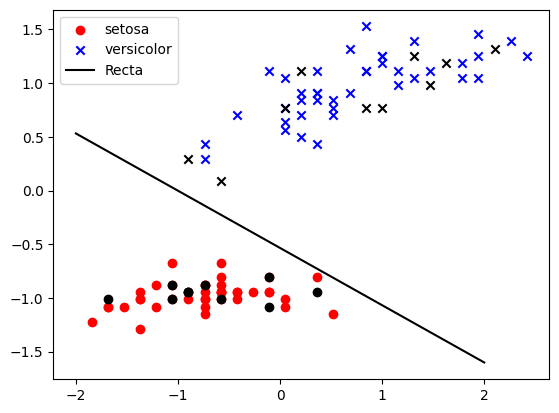

In [44]:
#------------------ Representación de la recta ------------------------------------
#Graficamos el conjunto de entrenamiento
m = -w[0, 0]/w[0, 1]
b = -w0[0]/w[0, 1]

plt.scatter(X_train[:, 0][y_train == 0], X_train[:, 1][y_train == 0], color='red', marker='o', label='setosa')
plt.scatter(X_train[:, 0][y_train == 1], X_train[:, 1][y_train == 1], color='blue', marker='x', label='versicolor')

#Agregamos la recta
x = np.linspace(-2, 2, 100)
plt.plot(x, m*x + b, label='Recta', color = 'black')
plt.legend(loc='upper left')

# ----------------------------------------------------------------------------------
#Agregamos los datos de testeo
plt.scatter(X_test[:, 0][y_test == 0], X_test[:, 1][y_test == 0], color='black', marker='o', label='setosa')
plt.scatter(X_test[:, 0][y_test == 1], X_test[:, 1][y_test == 1], color='black', marker='x', label='versicolor')

Ahora grafique los datos usando la función `plot_decision_regions` del módulo `utiles.py`, grafique datos de entrenamiento y prueba (se le deben pasar los índices de los datos de prueba a la función).

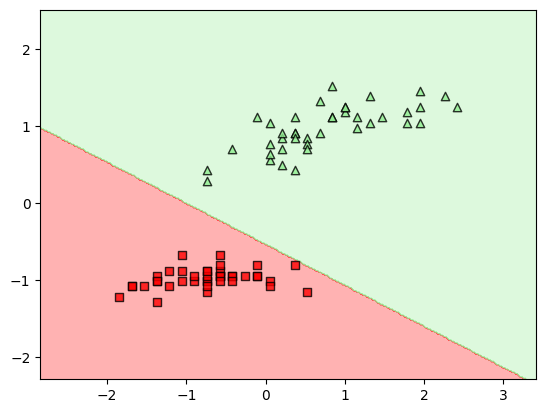

In [45]:
from modules.utiles import plot_decision_regions
plot_decision_regions(X_train, y_train, ppn)

Utilice la función `accuracy_score` para obtener el desempeño con los datos de prueba. [Documentación](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

In [46]:
y_pred = ppn.predict(X_test)
print((y_pred==y_test).all())

True


In [47]:
accuracy_score(y_test, y_pred)

1.0

Ahora repita el procedimiento pero con las 3 clases e iguales características y grafique la región de decisión usando la función `plot_decision_regions`

In [48]:
from sklearn import datasets

iris_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

In [49]:
iris_df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [50]:
iris_df2 = iris_df[[0,2,4]]

In [51]:
iris_df2


,0,2,4
0,5.1,1.4,Iris-setosa
1,4.9,1.4,Iris-setosa
2,4.7,1.3,Iris-setosa
3,4.6,1.5,Iris-setosa
4,5.0,1.4,Iris-setosa
...,...,...,...
145,6.7,5.2,Iris-virginica
146,6.3,5.0,Iris-virginica
147,6.5,5.2,Iris-virginica
148,6.2,5.4,Iris-virginica


In [52]:
caract = iris_df2.iloc[:, :2]
target = iris_df2.iloc[:, 2]
target = target.map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

X = caract.copy()
y = target.copy()

print(X.shape)
print(y.shape)

(150, 2)
(150,)


In [53]:
y.value_counts()

4
0    50
1    50
2    50
Name: count, dtype: int64

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=1,  stratify = y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 2)
(30, 2)
(120,)
(30,)


In [55]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler()),
])

In [56]:
X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

In [57]:
ppn2 = Perceptron(max_iter=30, eta0=0.1, random_state=1, shuffle=True)
ppn2.fit(X_train, y_train)

Perceptron(eta0=0.1, max_iter=30, random_state=1)

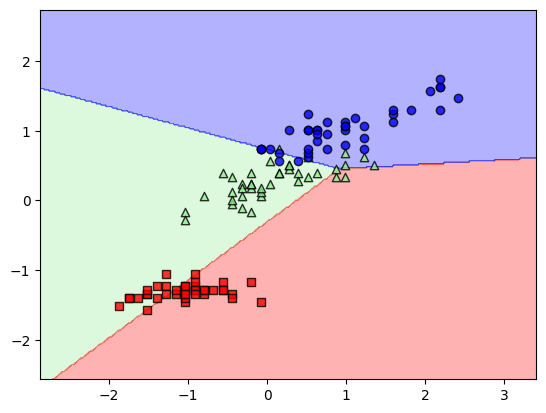

In [58]:
plot_decision_regions(X_train, y_train, ppn2)

In [59]:
y_pred = ppn2.predict(X_test)
print((y_pred==y_test).all())

False


In [60]:
accuracy_score(y_test, y_pred)

0.7333333333333333